# Brain Tumor Segmentation using SLIC

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# img = cv2.imread('C:/Users/user/Downloads/final year sem 1/VIP/project/brain tumor dataset/images/181.png', cv2.IMREAD_GRAYSCALE)

# #simple global thresholding
# ret,th1 = cv2.threshold(img,90,255,cv2.THRESH_BINARY)

# plt.figure(figsize=(12,6))
# plt.subplot(121), plt.imshow(img,cmap='gray')
# plt.title('Grayscale Image')
# plt.xticks([]), plt.yticks([])
# plt.subplot(122), plt.imshow(th1,cmap='gray')
# plt.title('Binary Image (Threshold: '+str(ret)+')')
# plt.xticks([]),plt.yticks([])
# plt.show()

In [3]:
# # morphological operations
# kernel = np.ones((5, 5), np.uint8)
# closing = cv2.morphologyEx(th1, cv2.MORPH_OPEN, kernel, iterations=7)

# # Display the original and the result
# plt.figure(figsize=(12, 6))

# plt.subplot(1, 2, 1)
# plt.title('Original Image')
# plt.imshow(th1, cmap='gray')
# plt.axis('off')

# plt.subplot(1, 2, 2)
# plt.title('Morphological Opening')
# plt.imshow(closing, cmap='gray')
# plt.axis('off')

# plt.show()

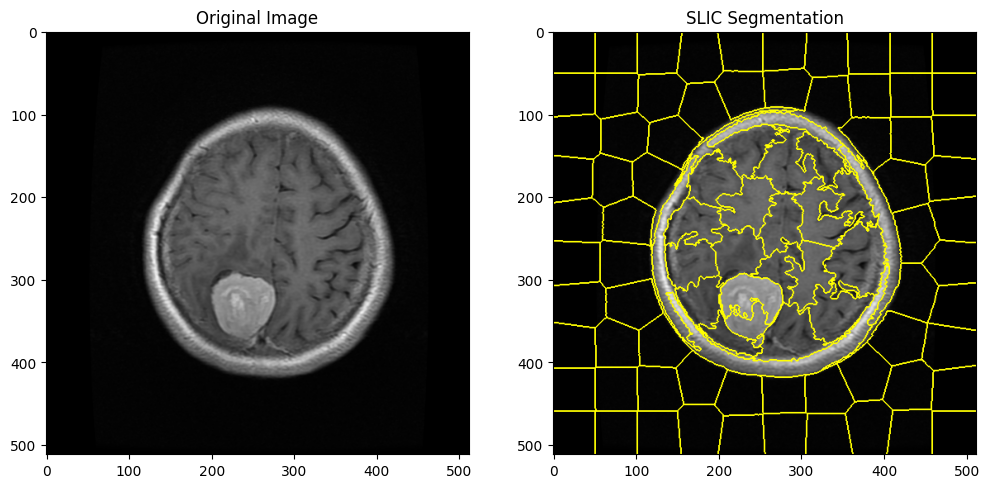

In [4]:
import cv2
import numpy as np
from skimage.segmentation import mark_boundaries
from skimage.segmentation import slic
import matplotlib.pyplot as plt

# Read the image
img = cv2.imread('C:/Users/user/Downloads/final year sem 1/VIP/project/brain tumor dataset/images/181.png', cv2.IMREAD_COLOR)

# Convert the image from BGR to RGB (for display with matplotlib)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Perform SLIC segmentation
segments = slic(img, n_segments=100, compactness=10)

# Create a mask using the segments
mask = np.zeros_like(img)
for seg_val in np.unique(segments):
    mask[segments == seg_val] = np.mean(img[segments == seg_val], axis=(0, 1))

# Display the original image and SLIC segmentation result
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].imshow(img_rgb)
ax[0].set_title('Original Image')

ax[1].imshow(mark_boundaries(img_rgb, segments))
ax[1].set_title('SLIC Segmentation')

plt.show()


In [5]:
!pip install scikit-image
!pip install networkx

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, segmentation
from skimage.segmentation import graph

# Load the image
image_path = 'C:/Users/user/Downloads/final year sem 1/VIP/project/brain tumor dataset/images/181.png'  # Replace with your actual image path
img = io.imread(image_path)

# Convert the image to grayscale
img_gray = color.rgb2gray(img)

# Apply SLIC segmentation
segments_slic = segmentation.slic(img, n_segments=100, compactness=10, sigma=1)

# Apply graph-based segmentation using the SLIC segments
g = graph.rag_mean_color(img_gray, segments_slic)  # Use img_gray instead of img
labels = graph.cut_normalized(segments_slic, g)

# Display the results
fig, ax = plt.subplots(1, 3, figsize=(12, 4), sharex=True, sharey=True)

ax[0].imshow(img)
ax[0].set_title('Original Image')

ax[1].imshow(segments_slic, cmap='nipy_spectral')
ax[1].set_title('SLIC Segmentation')

# Color the segmented regions on the original image
img_segments_colored = segmentation.mark_boundaries(img, segments_slic, color=(1, 0, 0), mode='thick')
ax[2].imshow(img_segments_colored)
ax[2].set_title('Segmented Image')

# Hide axes
for a in ax:
    a.axis('off')

plt.show()


ImportError: cannot import name 'graph' from 'skimage.future' (C:\Users\user\AppData\Roaming\Python\Python311\site-packages\skimage\future\__init__.py)